# CROP-seq KO150 - Compare KO cross-prediction similarity graph with STRING database entries
- goal: Quantify the proportion of connections that can be explained using PPI
- input: adjacecny matrix
- output: overlapping edges/connections and score comparison

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/src"

[1] "/home/sreichl/projects/bmdm-stim"

In [2]:
# libraries
library(STRINGdb)
library(igraph)
library(ggplot2)
library(ggrepel)
set.seed(42)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
# configs
data_path <- file.path('results','KO150')
results_path <- file.path(data_path, 'KO_classifier')

cond <- 'untreated'
# cond <- 'LO28-6h'
# cond <- 'LO28-24h'
# cond <- 'all'

results_path <- file.path(results_path, cond)

# classifier flag
clf_label <- 'LR'
# clf_label <- 'RF'

# approach flag (counting or probabilities)
conn_label <- 'prob'
# conn_label <- 'count'

# directed or undirected (symmetric) graph
directed <- TRUE
# directed <- FALSE

In [4]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

## Load adjacency matrix

In [5]:
conn <- read.csv(file=file.path(results_path, paste0("KO150_clf",clf_label,"_conn",conn_label,"Norm.csv")), row.names=1)
colnames(conn)<-gsub('.KO','',colnames(conn))
rownames(conn)<-gsub(' KO','',rownames(conn))
dim(conn)
conn

[1] 21 21

,Arid1a,Brd2,Chd4,Chd8,Dnmt1,Dnttip2,Ep300,Ep400,Ifnar1,Ikzf1,⋯,Jak1,Med14,Runx1,Sf3b1,Sfpq,Smc1a,Spi1,Stat2,Tyk2,Yeats2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arid1a,0.000000000,0.186634682,0.014302303,0.035631578,0.058896321,0.042082410,0.036577488,0.085455285,0.016418065,0.030894397,⋯,0.016081500,0.028479148,0.039085025,0.016456759,0.054434760,0.026736799,0.046836760,0.029085071,0.11231868,0.072357528
Brd2,0.164845762,0.000000000,0.067896326,0.056526750,0.036361084,0.027331276,0.060420050,0.088024403,0.043261370,0.036717918,⋯,0.029943889,0.031304030,0.027288610,0.019926716,0.034255254,0.046860037,0.039981106,0.038692808,0.06748446,0.033155580
Chd4,0.013106225,0.129902432,0.000000000,0.036193906,0.084227698,0.063028252,0.192843351,0.046537436,0.023960842,0.032146733,⋯,0.021570085,0.078030322,0.033447444,0.008215223,0.035792915,0.046470975,0.023093139,0.019010889,0.06075891,0.035627698
Chd8,0.051732792,0.057286599,0.035963218,0.000000000,0.039480798,0.091509673,0.060796584,0.074397465,0.011481984,0.108707897,⋯,0.011723338,0.021349931,0.041815205,0.012649977,0.020133531,0.041099213,0.033203838,0.012936198,0.07948048,0.171136854
Dnmt1,0.098068836,0.048366592,0.081501545,0.064515032,0.000000000,0.041307633,0.096180960,0.047263204,0.022939749,0.108320213,⋯,0.016763113,0.043179620,0.044922778,0.010663462,0.028232088,0.036769023,0.024185057,0.031273432,0.09186449,0.036817421
Dnttip2,0.062335620,0.034680382,0.048351496,0.138147993,0.039134752,0.000000000,0.047770395,0.090668157,0.012348394,0.054895341,⋯,0.011918485,0.034830427,0.041063689,0.011918661,0.039807081,0.021342603,0.022258754,0.019152753,0.02955289,0.222072322
Ep300,0.032537358,0.070805365,0.113577774,0.037269703,0.042750513,0.040212677,0.000000000,0.029465758,0.007624812,0.072211208,⋯,0.014989397,0.127732917,0.041485971,0.012292329,0.162446753,0.069111978,0.036059137,0.016922479,0.02293103,0.034312897
Ep400,0.099390753,0.083294516,0.025111944,0.093834912,0.037489087,0.121642455,0.025706739,0.000000000,0.017383874,0.112902352,⋯,0.015783479,0.009981250,0.024560214,0.011268131,0.050782366,0.029284519,0.047524046,0.032532110,0.05081418,0.090471578
Ifnar1,0.006623267,0.005318444,0.003088163,0.005672822,0.003061248,0.006027225,0.001841277,0.004236327,0.000000000,0.004041131,⋯,0.291423784,0.003633456,0.002304488,0.004317831,0.001753241,0.006223071,0.004094231,0.101278168,0.03974823,0.003285263


# Prune and make symmetric graph

In [6]:
cutoff <- 0.1

In [7]:
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

In [8]:
# prune graph
conn[conn<cutoff] <- 0

# make symmetric
conn <- conn+t(conn)
conn[upper.tri(conn)] <- 0
conn <- conn/2

# scale ie divide by max OR min/max scaling OR no scaling
# conn <- conn/max(conn)

dim(conn)
head(conn)

[1] 21 21

,Arid1a,Brd2,Chd4,Chd8,Dnmt1,Dnttip2,Ep300,Ep400,Ifnar1,Ikzf1,⋯,Jak1,Med14,Runx1,Sf3b1,Sfpq,Smc1a,Spi1,Stat2,Tyk2,Yeats2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arid1a,0.0000000,0.00000000,0,0.000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Brd2,0.1757402,0.00000000,0,0.000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Chd4,0.0000000,0.06495122,0,0.000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Chd8,0.0000000,0.00000000,0,0.000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Dnmt1,0.0000000,0.00000000,0,0.000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Dnttip2,0.0000000,0.00000000,0,0.069074,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


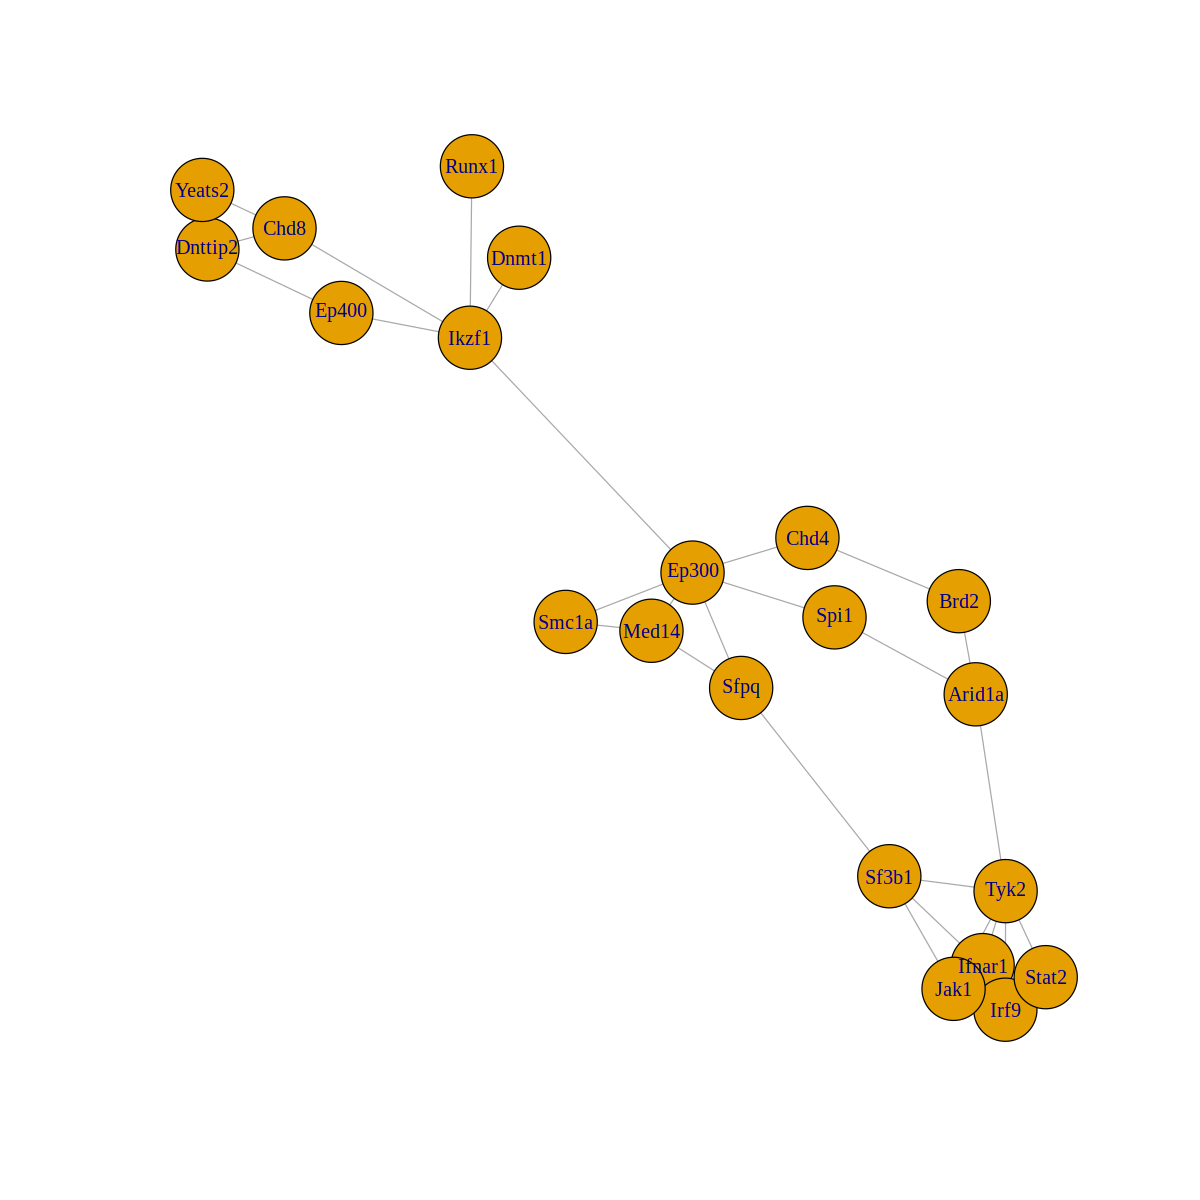

In [9]:
conn_graph <- graph_from_adjacency_matrix(
  as.matrix(conn),
  mode = "lower", #c("directed", "undirected", "max", "min", "upper", "lower", "plus"),
  weighted = TRUE,
  diag = FALSE,
  add.colnames = NULL,
  add.rownames = NA
)

# sanity check of symmetric graph
plot(conn_graph)

# Query STRING DB to get physical interactions

In [10]:
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

In [11]:
# string parameters
score_th <- 100 #200 0 400=default 100=0.1 would correspond to the crosspredict cutoff
network_type <- "full" #"physical" "full"

In [12]:
# get STRING DB content for mouse (10090)
string_db <- STRINGdb$new(version="11.5", species=10090, score_threshold=score_th, network_type=network_type, input_directory="")
string_db

***********  STRING - https://string-db.org   ***********
(Search Tool for the Retrieval of Interacting Genes/Proteins)  
version: 11.5
species: 10090
............please wait............
proteins: 22048
interactions: 14496358

In [13]:
genes <- data.frame(name=rownames(conn), row.names=rownames(conn))
dim(genes)
head(genes)

[1] 21  1

,name
,<chr>
Arid1a,Arid1a
Brd2,Brd2
Chd4,Chd4
Chd8,Chd8
Dnmt1,Dnmt1
Dnttip2,Dnttip2


In [14]:
genes <- string_db$map(genes, "name", removeUnmappedRows = TRUE, quiet=FALSE)
rownames(genes) <- genes$STRING_id
dim(genes)
head(genes)

[1] 21  2

,name,STRING_id
,<chr>,<chr>
10090.ENSMUSP00000122354,Arid1a,10090.ENSMUSP00000122354
10090.ENSMUSP00000109880,Brd2,10090.ENSMUSP00000109880
10090.ENSMUSP00000060054,Chd4,10090.ENSMUSP00000060054
10090.ENSMUSP00000087184,Chd8,10090.ENSMUSP00000087184
10090.ENSMUSP00000004202,Dnmt1,10090.ENSMUSP00000004202
10090.ENSMUSP00000045043,Dnttip2,10090.ENSMUSP00000045043


In [15]:
# plot STRING network

# save STRING network as pdf
pdf(file=file.path(results_path,paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING.pdf")), width=10, height=10)

string_db$plot_network(genes$STRING_id, required_score = 100, add_link=TRUE)

dev.off()

# save STRING network as png
string_db$get_png(genes$STRING_id, required_score=100, network_flavor="confidence", file=file.path(results_path,paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING.png")), payload_id=NULL)

png 
  2

, , 1

       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [13,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [29,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [44,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [50,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [51,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [52,]    0    0    0    0    0    0    0

In [16]:
# get interactions between KO genes
interactions <- string_db$get_interactions(genes$STRING_id)
# remove duplicates
interactions <- interactions[!duplicated(interactions), ]
# map stringdb ids back to gene names
interactions$from_gene <- sapply(interactions$from, function(x) genes[x,'name'])
interactions$to_gene <- sapply(interactions$to, function(x) genes[x,'name'])

dim(interactions)
head(interactions)

[1] 109   5

,from,to,combined_score,from_gene,to_gene
,<chr>,<chr>,<int>,<chr>,<chr>
1,10090.ENSMUSP00000001036,10090.ENSMUSP00000002180,205,Tyk2,Spi1
3,10090.ENSMUSP00000002180,10090.ENSMUSP00000004202,531,Spi1,Dnmt1
5,10090.ENSMUSP00000001036,10090.ENSMUSP00000018798,356,Tyk2,Ikzf1
7,10090.ENSMUSP00000002180,10090.ENSMUSP00000018798,904,Spi1,Ikzf1
9,10090.ENSMUSP00000004202,10090.ENSMUSP00000018798,261,Dnmt1,Ikzf1
11,10090.ENSMUSP00000002180,10090.ENSMUSP00000023673,957,Spi1,Runx1


In [17]:
min(interactions$combined_score)
max(interactions$combined_score)

[1] 152

[1] 999

In [18]:
# get names for row and columns
nameVals <- rownames(conn)
# construct 0 matrix of correct dimensions with row and column names
myMat <- matrix(0, length(nameVals), length(nameVals), dimnames = list(nameVals, nameVals))

# fill in the matrix with matrix indexing on row and column names
myMat[as.matrix(interactions[c("from_gene", "to_gene")])] <- interactions[["combined_score"]]
interactions_df <- as.data.frame(myMat)

In [19]:
# make it lower triangle
interactions_df <- interactions_df+t(interactions_df)
interactions_df[upper.tri(interactions_df)] <- 0

# scale ie divide by max or 1000 (as the scores are probabilities)
interactions_df <- interactions_df/1000 #max(interactions_df)

In [20]:
interactions_df

,Arid1a,Brd2,Chd4,Chd8,Dnmt1,Dnttip2,Ep300,Ep400,Ifnar1,Ikzf1,⋯,Jak1,Med14,Runx1,Sf3b1,Sfpq,Smc1a,Spi1,Stat2,Tyk2,Yeats2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arid1a,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Brd2,0.572,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Chd4,0.665,0.647,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Chd8,0.614,0.553,0.380,0.000,0.000,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Dnmt1,0.321,0.291,0.590,0.257,0.000,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Dnttip2,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Ep300,0.967,0.783,0.982,0.747,0.570,0,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Ep400,0.814,0.715,0.350,0.463,0.208,0,0.842,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0
Ifnar1,0.000,0.000,0.000,0.000,0.000,0,0.172,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0


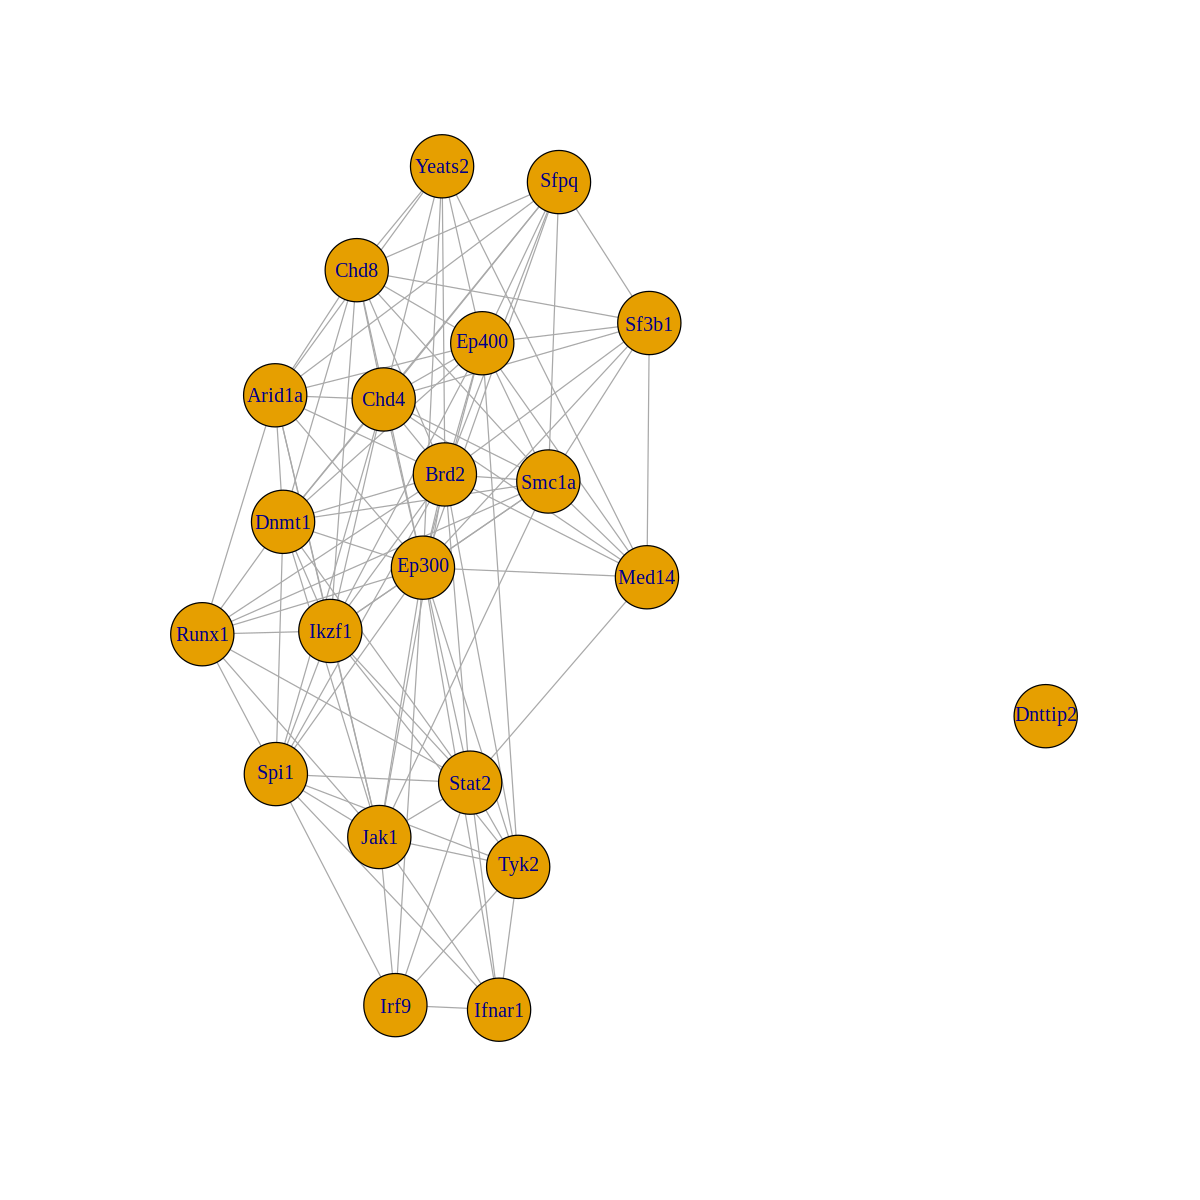

In [21]:
int_graph <- graph_from_adjacency_matrix(
  as.matrix(interactions_df),
  mode = "lower", #c("directed", "undirected", "max", "min", "upper", "lower", "plus"),
  weighted = TRUE,
  diag = FALSE,
  add.colnames = NULL,
  add.rownames = NA
)

# sanity check of symmetric graph
plot(int_graph)

# Compare graphs

In [23]:
int_unique_graph <- difference(int_graph, conn_graph)
conn_unique_graph <- difference(conn_graph, int_graph)
intersect_graph <- intersection(conn_graph, int_graph)
union_graph <- union(conn_graph, int_graph)

In [24]:
# write this summary in a text file
stats <- paste0('crosspredict edges ',length(E(conn_graph)),"\n",
'STRING interaction edges ',length(E(int_graph)),"\n",
'unique STRING interaction edges ',length(E(int_unique_graph)),"\n",
'unique crosspredict edges ',length(E(conn_unique_graph)),"\n",
'intersecting edges ',length(E(intersect_graph)),"\n",
'union edges ',length(E(union_graph)),"\n",
'percentage crosspredict edges predicted by STRING ',round(length(E(intersect_graph))/length(E(conn_graph)), 2),"\n")

stats

write(stats, file=file.path(results_path,paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_comparison.txt")))

[1] "crosspredict edges 34\nSTRING interaction edges 109\nunique STRING interaction edges 84\nunique crosspredict edges 9\nintersecting edges 25\nunion edges 118\npercentage crosspredict edges predicted by STRING 0.74\n"

In [25]:
# crosspredict graph edges
edge_names <- apply(ends(conn_graph, E(conn_graph), names = TRUE), MARGIN=1, FUN=function(x) paste0(x[1],'-',x[2]))
conn_df <- data.frame(row.names=edge_names)
conn_df$scores <- edge_attr(conn_graph,name='weight', index = E(conn_graph))
dim(conn_df)
# head(conn_df)

[1] 34  1

In [26]:
# string graph edges
edge_names <- apply(ends(int_graph, E(int_graph), names = TRUE), MARGIN=1, FUN=function(x) paste0(x[1],'-',x[2]))
int_df <- data.frame(row.names=edge_names)
int_df$scores <- edge_attr(int_graph,name='weight', index = E(int_graph))
dim(int_df)
# head(int_df)

[1] 109   1

In [27]:
# union graph edges (ie all edges)
edge_names <- apply(ends(union_graph, E(union_graph), names = TRUE), MARGIN=1, FUN=function(x) paste0(x[1],'-',x[2]))
                    
union_df <- data.frame(row.names=edge_names)
union_df$string <- int_df[rownames(union_df),'scores']
union_df$crosspredict <- conn_df[rownames(union_df),'scores']
                    
union_df[is.na(union_df)] <- 0

dim(union_df)
head(union_df)

[1] 118   2

,string,crosspredict
,<dbl>,<dbl>
Stat2-Tyk2,0.994,0.14766625
Spi1-Tyk2,0.205,0.00000000
Spi1-Stat2,0.376,0.00000000
Sfpq-Smc1a,0.154,0.00000000
Sf3b1-Tyk2,0.000,0.06691174
Sf3b1-Smc1a,0.245,0.00000000


In [28]:
# indicated intersecting edges
edge_names <- apply(ends(intersect_graph, E(intersect_graph), names = TRUE), MARGIN=1, FUN=function(x) paste0(x[1],'-',x[2]))
union_df$overlap <- FALSE
union_df[edge_names,'overlap'] <- TRUE

In [29]:
# indicate unique genes

# crosspredict
edge_names <- apply(ends(conn_unique_graph, E(conn_unique_graph), names = TRUE), MARGIN=1, FUN=function(x) paste0(x[1],'-',x[2]))
union_df$unique_crosspredict <- FALSE
union_df[edge_names,'unique_crosspredict'] <- TRUE
                    
# string
edge_names <- apply(ends(int_unique_graph, E(int_unique_graph), names = TRUE), MARGIN=1, FUN=function(x) paste0(x[1],'-',x[2]))
union_df$unique_string <- FALSE
union_df[edge_names,'unique_string'] <- TRUE

In [30]:
# save table as CSV
write.csv(union_df, file=file.path(results_path,paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_comparison.csv")))

# Quantify and Visualize the scores of intersection or union of edges

In [22]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [31]:
# check if distribution is normal? -> nope
# stat different? -> yes

In [32]:
shapiro.test(union_df[(union_df$string>0),"string"])

shapiro.test(union_df[(union_df$string>0) & (union_df$overlap),'string'])

shapiro.test(union_df[(union_df$string>0) & (!union_df$overlap),'string'])

t.test(x=union_df[(union_df$string>0) & (union_df$overlap),'string'], y=union_df[(union_df$string>0) & (!union_df$overlap),'string'])


	Shapiro-Wilk normality test

data:  union_df[(union_df$string > 0), "string"]
W = 0.84995, p-value = 3.958e-09



	Shapiro-Wilk normality test

data:  union_df[(union_df$string > 0) & (union_df$overlap), "string"]
W = 0.83932, p-value = 0.001112



	Shapiro-Wilk normality test

data:  union_df[(union_df$string > 0) & (!union_df$overlap), "string"]
W = 0.83545, p-value = 3.07e-08



	Welch Two Sample t-test

data:  union_df[(union_df$string > 0) & (union_df$overlap), "string"] and union_df[(union_df$string > 0) & (!union_df$overlap), "string"]
t = 4.2575, df = 33.009, p-value = 0.000161
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1517482 0.4295118
sample estimates:
mean of x mean of y 
  0.68588   0.39525 


In [33]:
#Perform the Mann-Whitney U test
wt_re <- wilcox.test(x=union_df[(union_df$string>0) & (union_df$overlap),'string'], y=union_df[(union_df$string>0) & (!union_df$overlap),'string'])

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


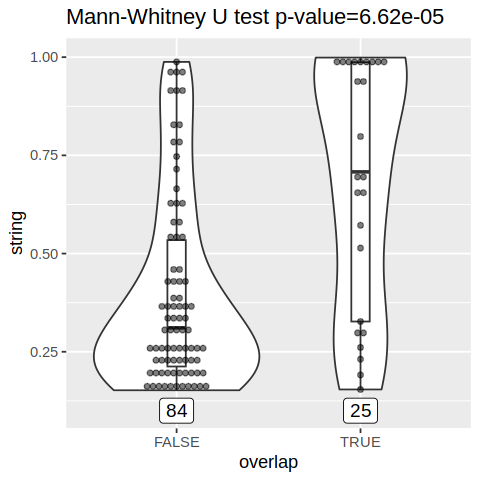

In [34]:
n_t <- length(E(intersect_graph)) #sum(union_df[union_df$string>0,'overlap'])
n_f <- length(E(int_unique_graph))

violin_plot <- ggplot(union_df[union_df$string>0,], aes(x=overlap, y=string)) + 
geom_violin(trim=TRUE)+ geom_boxplot(width=0.1) +
geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5, alpha=0.5)+
annotate(x=FALSE, y = 0.1, label=paste0(n_f), geom="label", hjust=0.5, size=4, color = 'black')+
annotate(x=TRUE, y = 0.1, label=paste0(n_t), geom="label", hjust=0.5, size=4, color = 'black')+
ggtitle(paste0('Mann-Whitney U test p-value=',formatC(wt_re$p.value, format = "e", digits = 2)))



violin_plot

# save plot
ggsave(paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_scores.png"),
      plot = violin_plot,
      device = 'png',
      path = file.path(results_path),
      scale = 1,
      dpi = 300,
        width = width,
        height = height,
      limitsize = FALSE,
    )

Warning message:
“ggrepel: 68 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 95 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


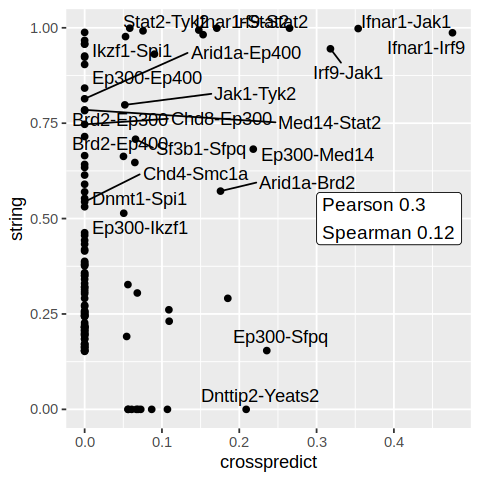

In [35]:
# correlation and visualization of all (union) edges
cor_p <- round(cor(union_df$string, union_df$crosspredict, method="pearson"),2)
cor_s <- round(cor(union_df$string, union_df$crosspredict, method="spearman"),2)

score_plot <- ggplot(union_df, aes(x=crosspredict, y=string, label = rownames(union_df))) + 
  geom_point() +
geom_text_repel() +
annotate(x=0.3, y = 0.5, label=paste0("Pearson ",cor_p,"\nSpearman ",cor_s), geom="label", hjust=0, size=4, color = 'black')

score_plot

# save plot
ggsave(paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_union_corr.png"),
      plot = score_plot,
      device = 'png',
      path = file.path(results_path),
      scale = 1,
      dpi = 300,
        width = width,
        height = height,
      limitsize = FALSE,
    )

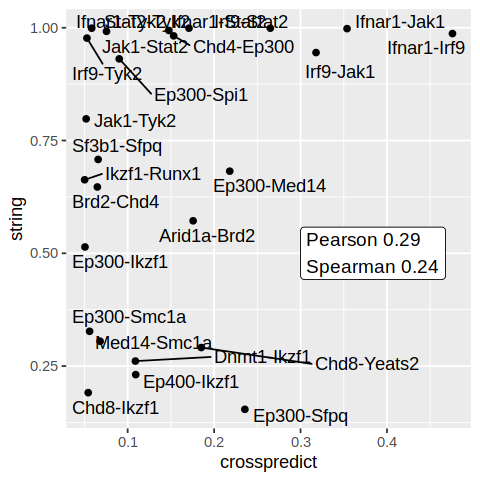

In [36]:
# correlation and visualization of overlapping edges
cor_p <- round(cor(union_df[union_df$overlap,'string'], union_df[union_df$overlap,'crosspredict'], method="pearson"),2)
cor_s <- round(cor(union_df[union_df$overlap,'string'], union_df[union_df$overlap,'crosspredict'], method="spearman"),2)

score_plot <- ggplot(union_df[union_df$overlap,], aes(x=crosspredict, y=string, label = rownames(union_df)[union_df$overlap])) + 
  geom_point() +
geom_text_repel() +
annotate(x=0.3, y = 0.5, label=paste0("Pearson ",cor_p,"\nSpearman ",cor_s), geom="label", hjust=0, size=4, color = 'black')

score_plot

# save plot
ggsave(paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_intersection_corr.png"),
      plot = score_plot,
      device = 'png',
      path = file.path(results_path),
      scale = 1,
      dpi = 300,
        width = width,
        height = height,
      limitsize = FALSE,
    )